<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png'></center>

# 0. 환경 설정

**1) 구글 코랩 한글 설정**

- 구글 코랩에서 차트를 그릴 때 한글이 표시되지 않는 문제 해결을 위해 단계 1, 2, 3을 순서대로 실행하세요.

In [1]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild() 

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild() 

**2) 그래프 크기 기본 사이즈 설정**
- figsize=(12, 5)를 매번 지정하기 번거로우니 다음과 같이 기본 크기를 설정합니다.

In [3]:
# 크기 기본 설정
plt.rcParams['figure.figsize'] = (12, 5)

**3) 라이브러리 불러오기**

- 이제 다음의 라이브러리는 Python에서 일상적으로 사용되는 라이브러리임을 알았을 것입니다.
- 우선 라이브러리를 불러오고 시작합니다.

In [4]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

**4) 파일 불러오기**

- 시각화 대상이 되는 데이터를 불러옵니다.

In [25]:
# weather
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_weather.csv'
weather = pd.read_csv(file_path, sep = ',', header=0, encoding='CP949')  

# spop
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop2020.csv'
spop = pd.read_csv(file_path, sep = ',', header=0, encoding='CP949')  

# retail
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/retail_new.csv'
retail = pd.read_csv(file_path, header=0)  

retail.drop(['product_id', 'customer_id', 'reg_date'], axis=1, inplace=True)
retail.columns = ['주문일', '제품', '분류', '출생연도', '성별', '주소1', '주소2', '수량', '금액']
retail['출생연도'] = retail['출생연도'] // 10 * 10
retail.insert(1, '주문연도', retail['주문일'].str[:4])
retail.insert(2, '주문연월', retail['주문일'].str[:7])
retail.drop('주문일', axis=1, inplace=True)

# 7. [참고] 향상된 시각화

- 기본 옵션으로 표시된 그래프도 상당히 좋습니다.
- 필요하다면 matplotlib 라이브러리 기능을 사용해 세부 사항을 조절할 수 있습니다.
- **너무 많은 조절은 오히려 결과를 복잡하게 만들 수 있음**을 기억해야 합니다.

In [26]:
# weather2019 데이터프레임 선언 
weather2019 = weather.loc[weather['기간'].between('2019-01', '2019-12')]
weather2019.reset_index(drop=True, inplace=True)

# 확인
weather2019.head()

,기간,기온,최고기온,극점최고기온,최저기온,극점최저기온,강수량,상대습도,풍속,최대풍속,최대순간풍속
0,2019-01,-0.9,4.1,8.5,-5.1,-10.1,0.0,46,1.8,6.8,12.0
1,2019-02,1.0,6.0,14.5,-3.2,-10.2,23.8,47,1.8,5.5,10.0
2,2019-03,7.1,12.4,17.6,2.7,-1.7,26.8,51,2.1,7.2,14.9
3,2019-04,12.1,17.6,28.2,7.2,0.3,47.3,51,1.9,7.3,12.8
4,2019-05,19.4,25.6,33.4,13.7,8.4,37.8,47,2.1,6.1,12.3


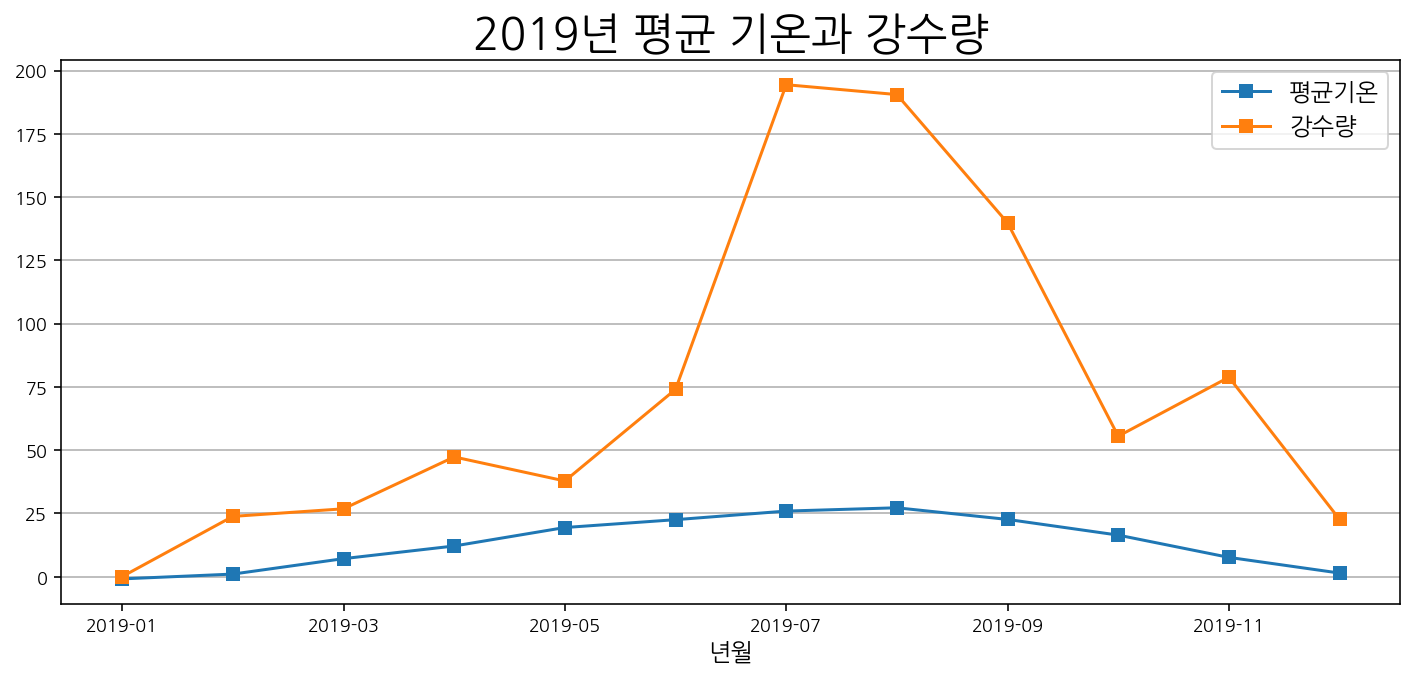

In [27]:
# 2019년 평균 기온과 강수량
weather2019.plot(kind='line', x='기간', y=['기온', '강수량'], marker='s')
plt.grid(True, axis='y')
plt.xlabel('년월')
plt.legend(['평균기온','강수량'])
plt.title('2019년 평균 기온과 강수량')
plt.show()

## 7.1. 글자 크기 일괄 조정

- 시각화에 사용될 글자 크기를 일괄 설정하면 좀더 보기 좋은 결과를 얻을 수 있습니다.

In [28]:
# 적당한 크기로 설정
FONT_SMALL = 9
FONT_MIDIUM = 12
FONT_LARGE = 22

# 폰트 크기 설정
plt.rc('font', size = FONT_MIDIUM)
plt.rc('axes', titlesize = FONT_LARGE)
plt.rc('axes', labelsize = FONT_MIDIUM)
plt.rc('xtick', labelsize = FONT_SMALL)
plt.rc('ytick', labelsize = FONT_SMALL)
plt.rc('legend', fontsize  = FONT_MIDIUM)
plt.rc('figure', titlesize = FONT_LARGE)  

- 플롯 크기도 기본 값을 설정합니다.

In [29]:
# 플롯 크기 기본 설정
plt.rcParams['figure.figsize'] = (12, 5)

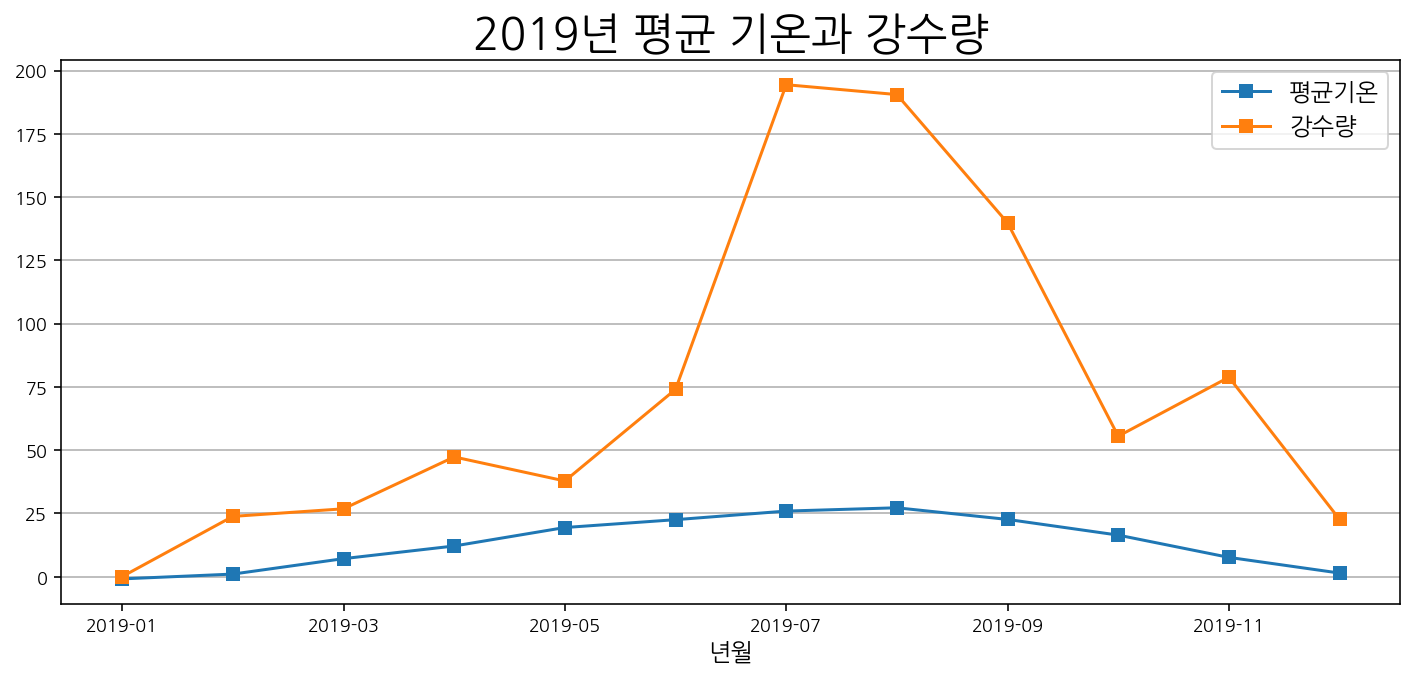

In [30]:
# 2019년 평균 기온과 강수량
weather2019.plot(kind='line', x='기간', y=['기온', '강수량'], marker='s')
plt.grid(True, axis='y')
plt.xlabel('년월')
plt.legend(['평균기온','강수량'])
plt.title('2019년 평균 기온과 강수량')
plt.show()

## 7.2. 두 개의 y 축 사용

- 여러 열의 값을 하나의 그래프로 표시할 때 값의 크기가 믾이 차이나서 문제가 될 경우가 있습니다.
- 이런 경우에 **secondary_y** 옵션을 사용해 보조 y 축을 표시하면 보기 좋은 결과가 됩니다.
- 단, 약간은 다른 코딩이 필요함을 숙지하시기 바랍니다.

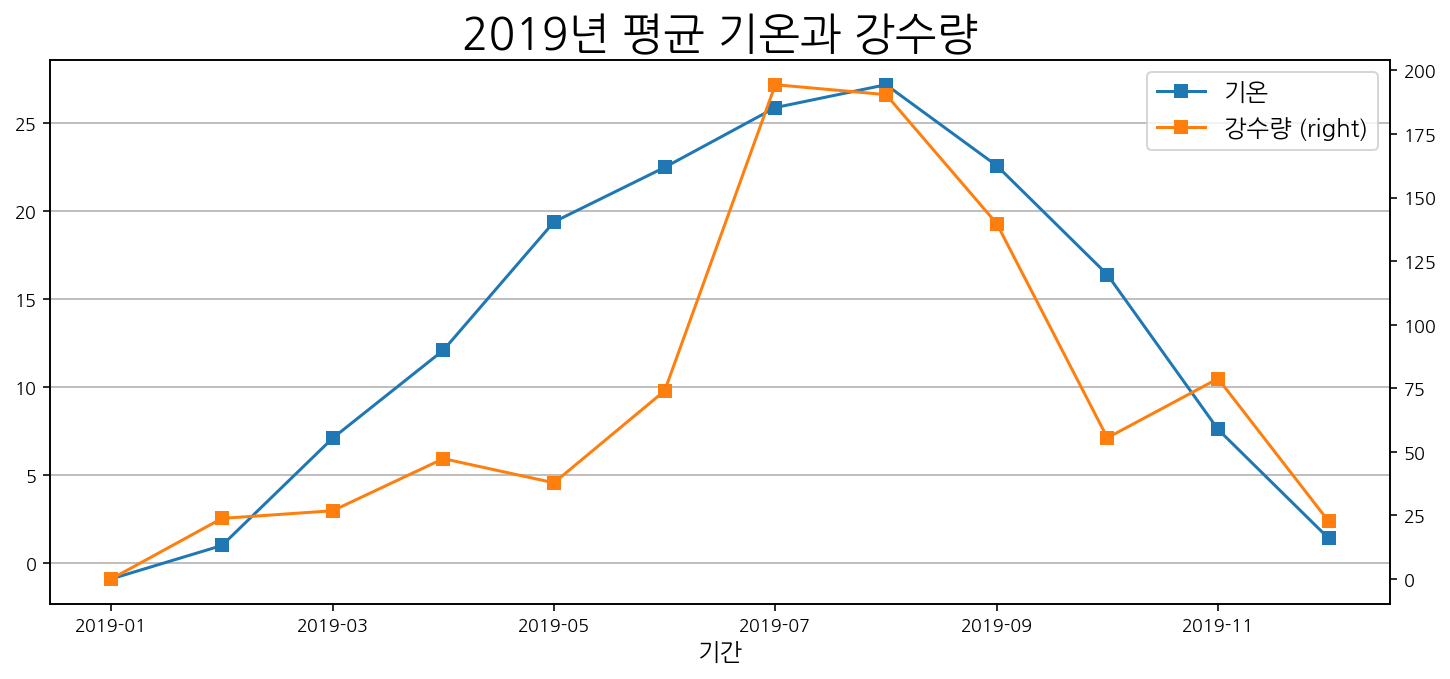

In [31]:
# 2019년 평균 기온과 강수량
fig, ax1 = plt.subplots()
ax=weather2019.plot(kind='line', x='기간', y=['기온'], 
                    marker='s', 
                    ax=ax1)
ax=weather2019.plot(kind='line', x='기간', y=['강수량'], 
                    marker='s', 
                    secondary_y=True, 
                    ax=ax1)
ax1.grid(True, axis='y')

plt.xlabel('년월')
plt.title('2019년 평균 기온과 강수량')
plt.show()

## 7.3. x 축 값 모두 표시

- 선 그래프는 값의 전체적인 변화를 보는 것이므로 x 축 값 일부가 생략되는 경우가 많습니다.
- **plt.xticks()** 함수로 표시되는 값을 제어할 수 있습니다.
- x 축 값이 겹치는 문제를 없애려면 **rot=45** 처럼 설정해서 값이 기울게 하면 됩니다.

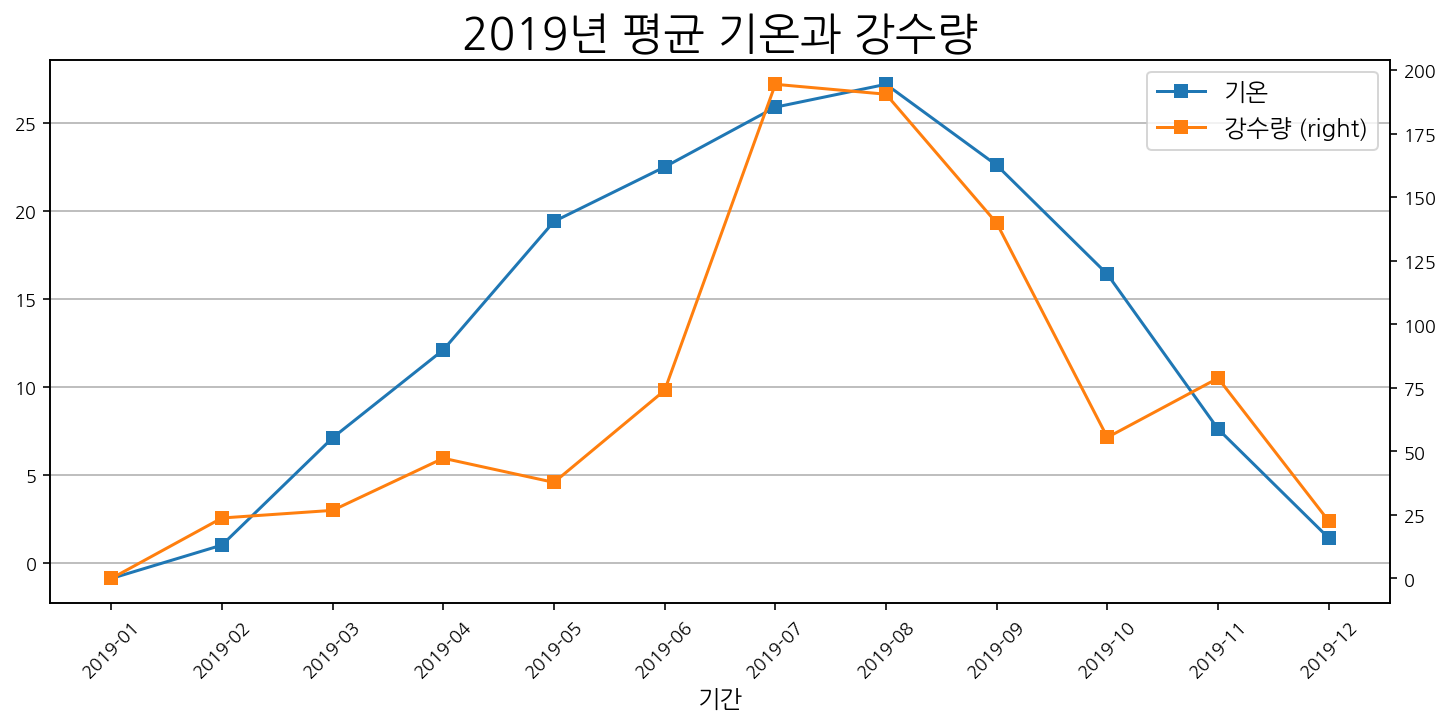

In [32]:
# 2019년 평균 기온과 강수량
fig, ax1 = plt.subplots()
weather2019.plot(kind='line', x='기간', y=['기온'], 
                 marker='s', 
                 ax=ax1)
weather2019.plot(kind='line', x='기간', y=['강수량'], 
                 marker='s', 
                 secondary_y=True, 
                 rot=45, 
                 ax=ax1)
ax1.grid(True, axis='y')

plt.xlabel('년월')
plt.xticks(range(0, 12), weather2019['기간'].values)
plt.title('2019년 평균 기온과 강수량')
plt.show()

## 7.4. 여러 종류의 그래프 결합

- 막대 그래프와 선 그래프를 함께 표시할 수 있습니다.
- 그리드 색상과 스타일 등을 조절하는 옵션도 같이 지정해 봅니다.

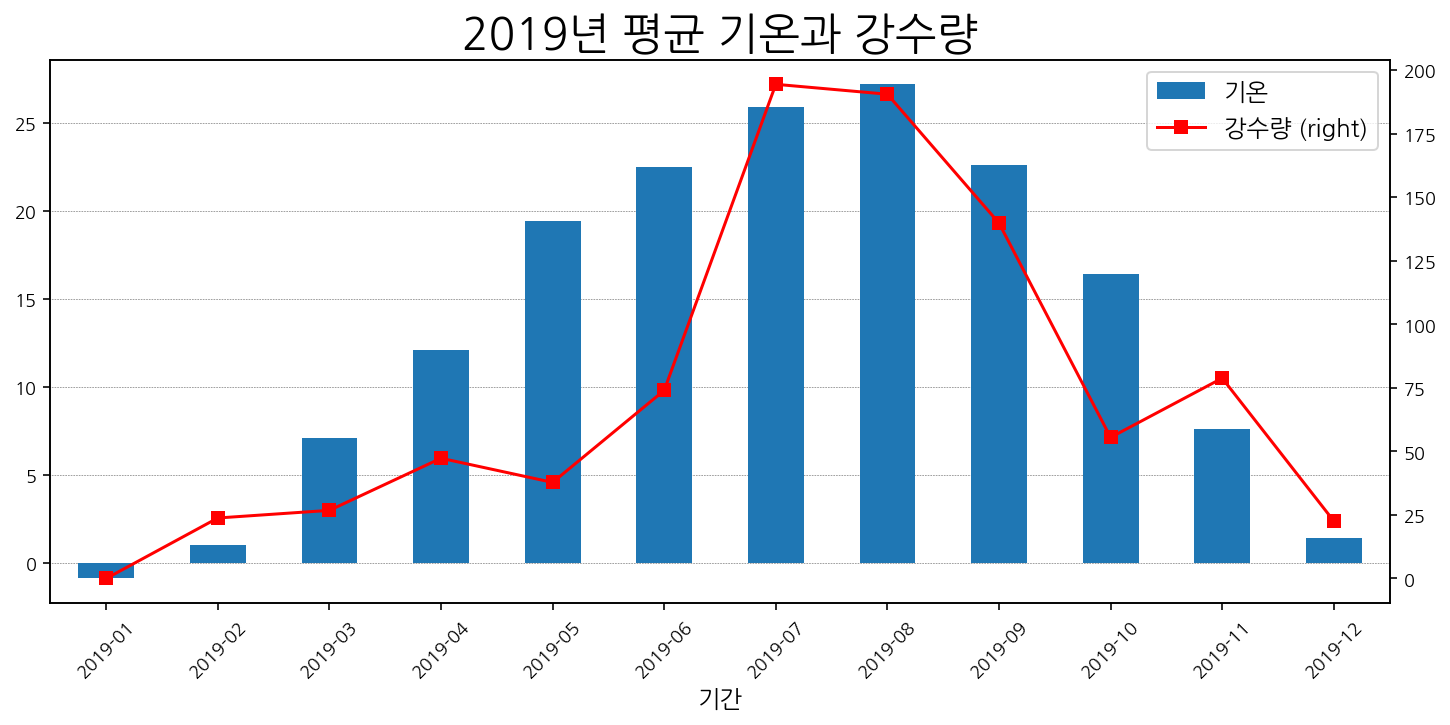

In [33]:
# 2019년 평균 기온과 강수량
fig, ax1 = plt.subplots()
weather2019.plot(kind='bar', x='기간', y=['기온'], 
                 ax=ax1)
weather2019.plot(kind='line', x='기간', y=['강수량'], 
                 marker='s', 
                 color='red', 
                 secondary_y=True, 
                 rot=45,
                 ax=ax1)
ax1.set_axisbelow(True)
ax1.grid(True, axis='y', linestyle=':',     # '-', '--', '-.', ':', '' 
         linewidth=0.3, 
         color='black') 

plt.xlabel('년월')
plt.title('2019년 평균 기온과 강수량')
plt.show()

## 7.5. 여러 개의 서브 플롯 사용하기

- 서브 플롯을 여러 개 선언해서 각기 다른 그래프를 표시할 수 있습니다. 
- **sharex=True** 옵션을 지정해 x 축 값을 공유할 수 있습니다.

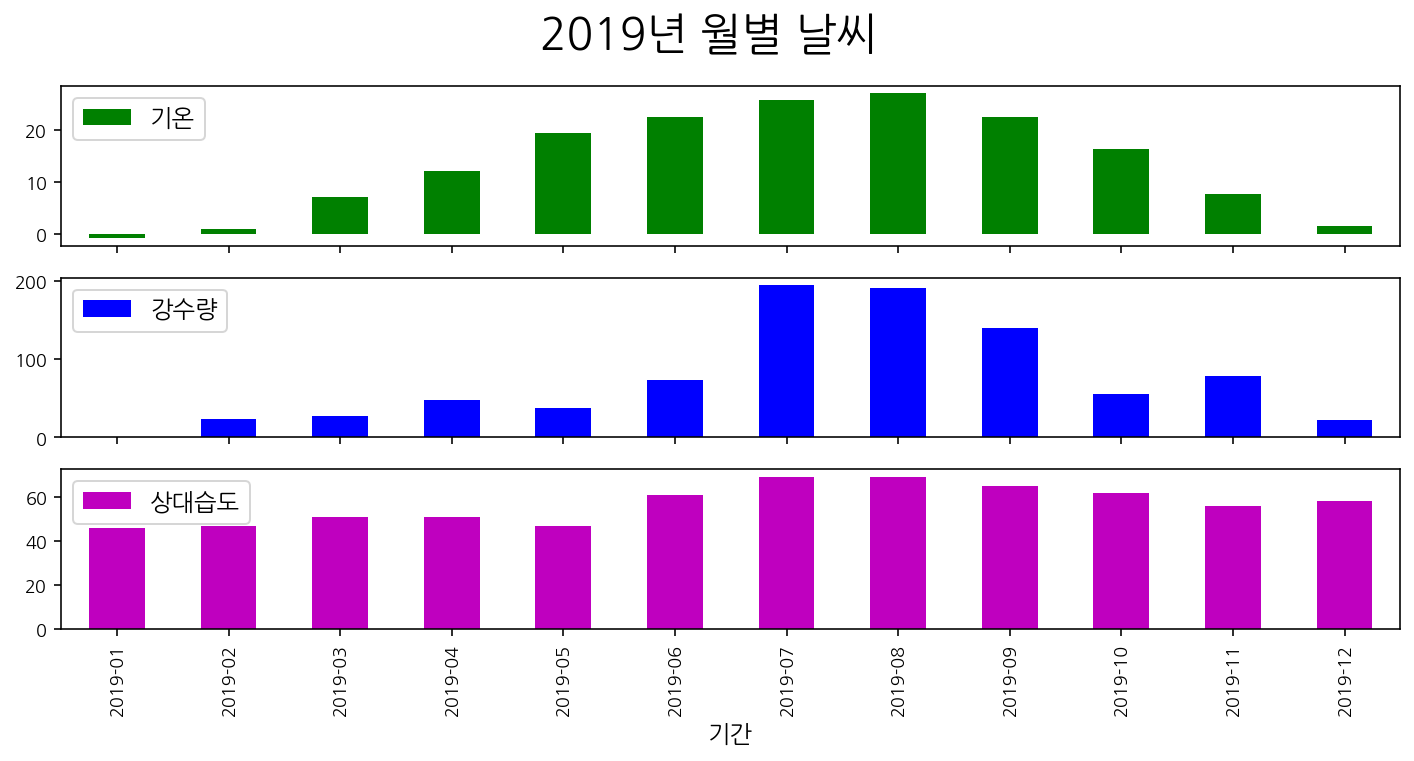

In [34]:
# 2019년 평균 기온, 강수량, 상대습도
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
weather2019.plot(kind='bar', x='기간', y=['기온'], color='g', ax=ax1)
weather2019.plot(kind='bar', x='기간', y=['강수량'], color='b', ax=ax2)
weather2019.plot(kind='bar', x='기간', y=['상대습도'], color='m', ax=ax3)
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
plt.suptitle('2019년 월별 날씨')
plt.show()

**[참고] 색상 이름표**

- 다음 셀의 코드를 실행하면 사용 가능한 색상의 이름을 확인할 수 있습니다.

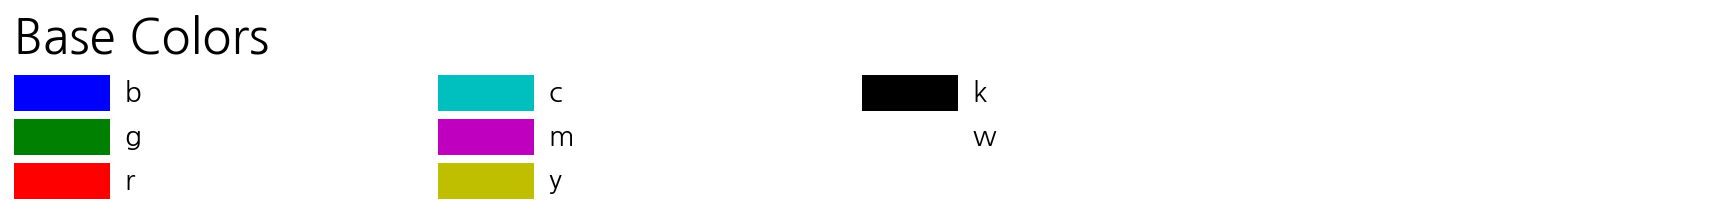

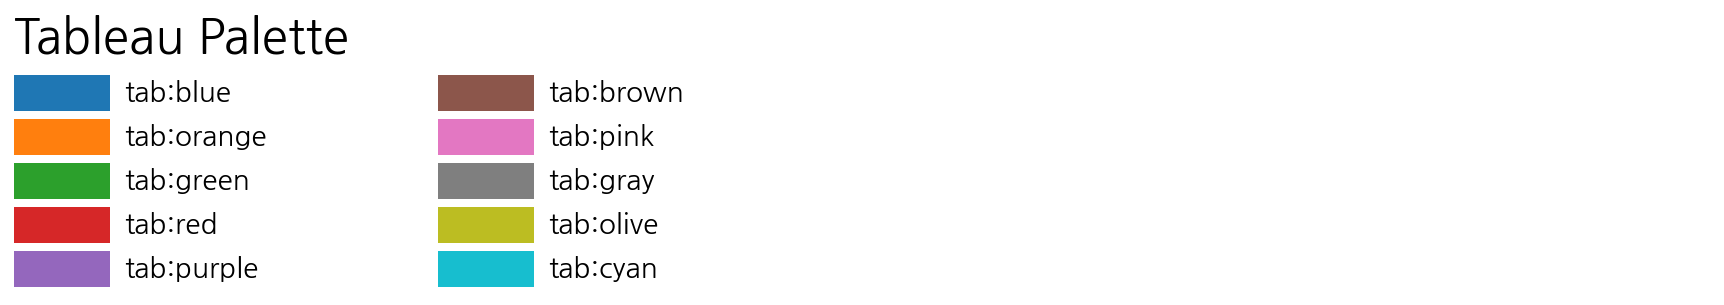

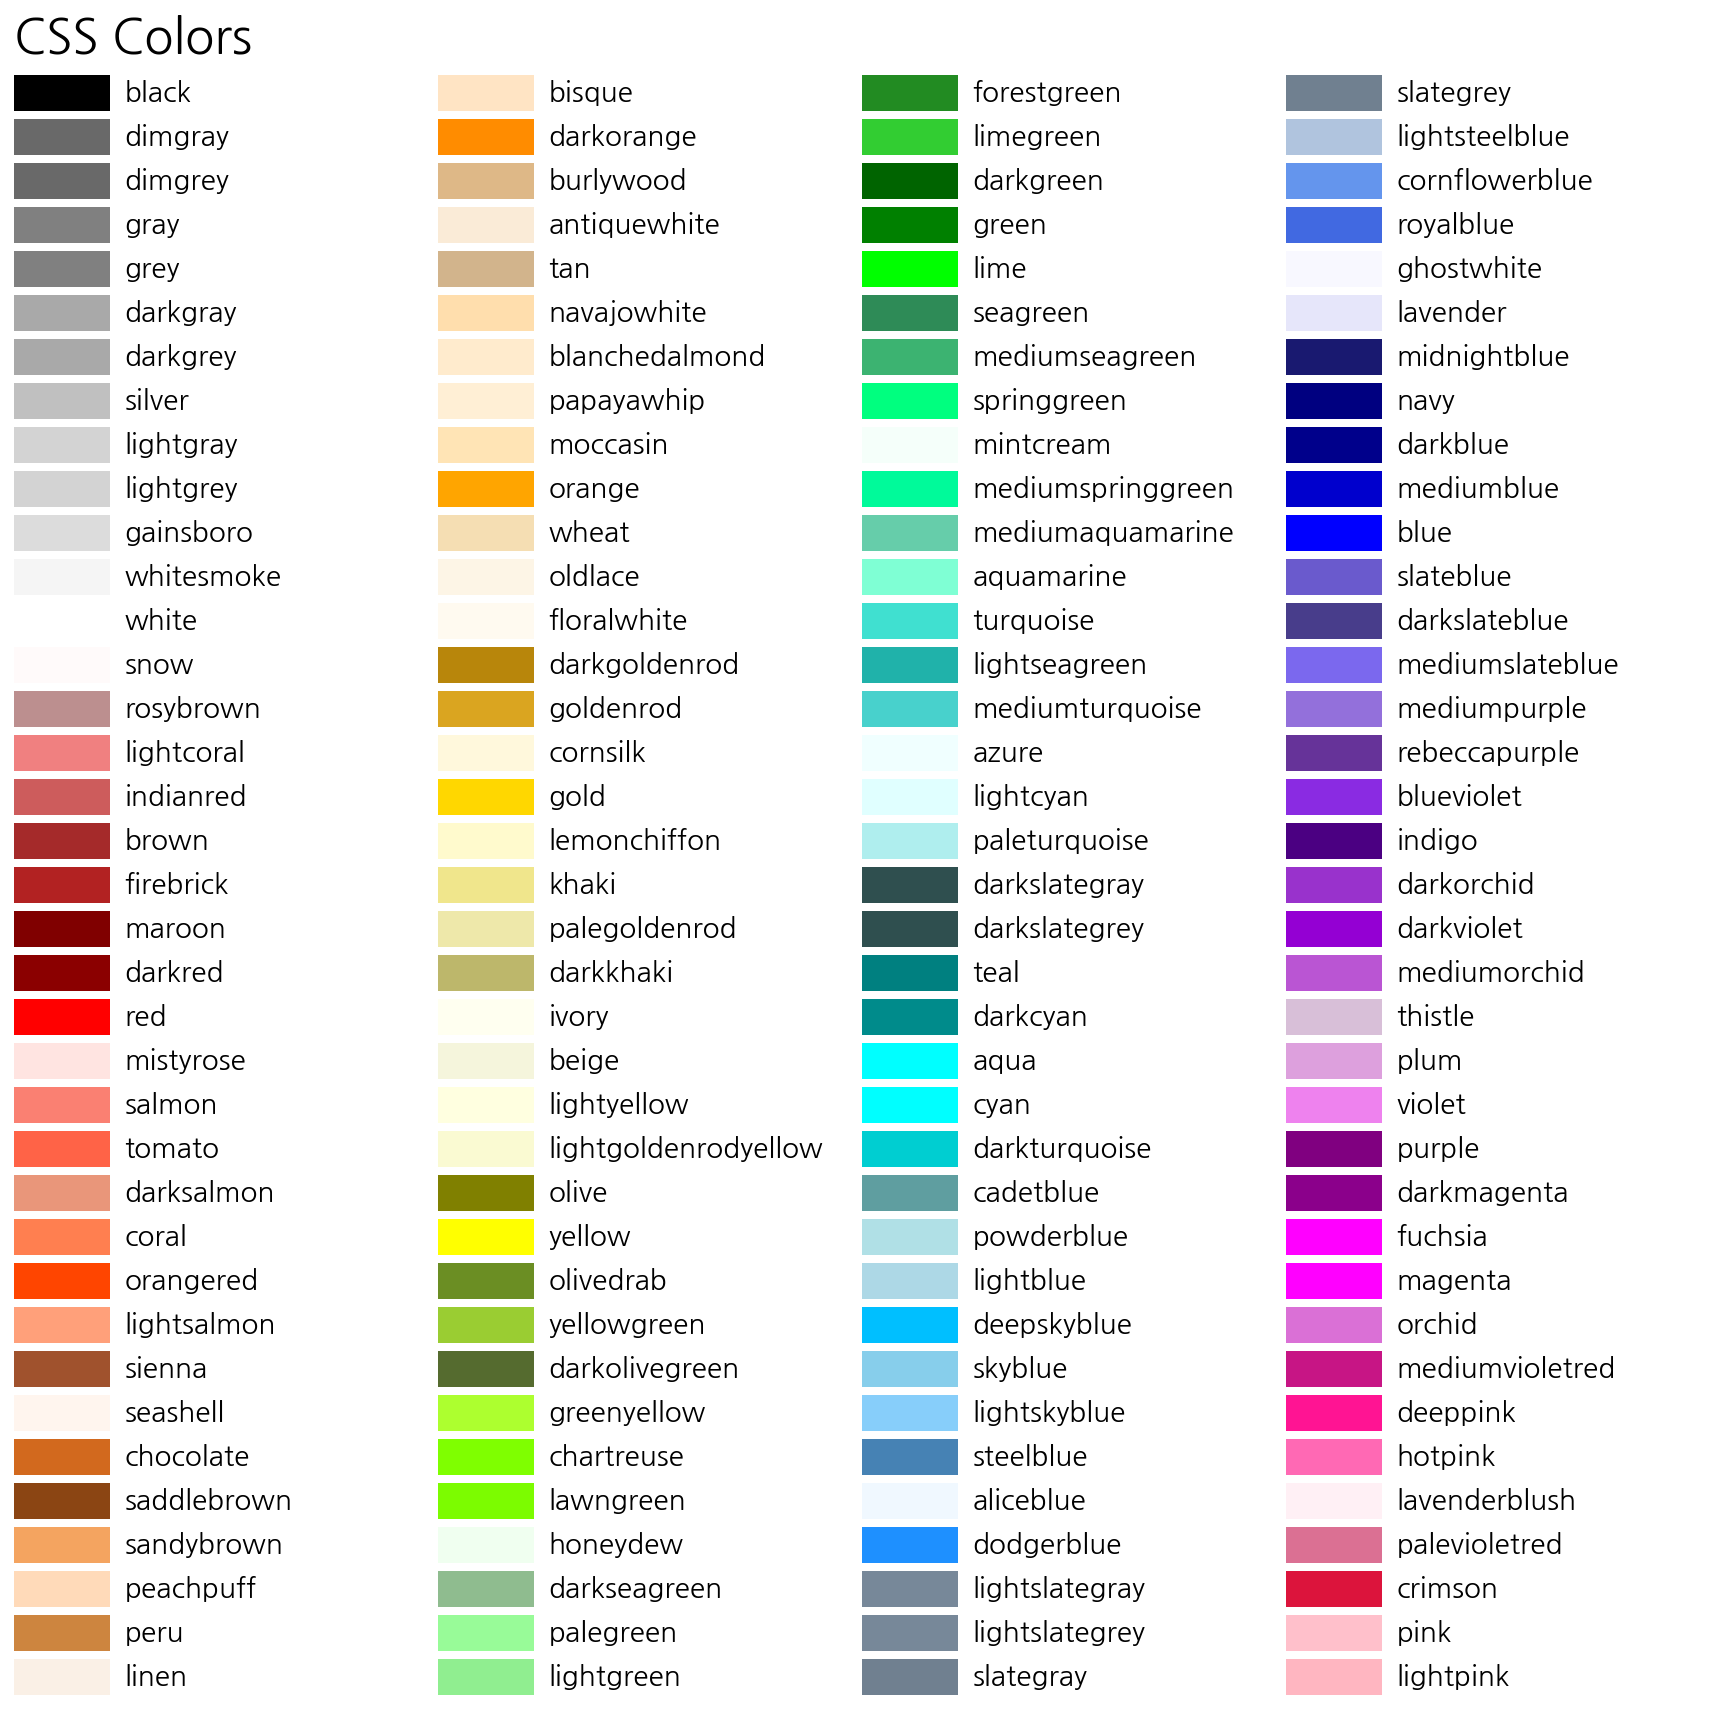

In [35]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        swatch_end_x = cell_width * col + swatch_width
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y, swatch_start_x, swatch_end_x,
                  color=colors[name], linewidth=18)

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

#sphinx_gallery_thumbnail_number = 3
plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

# Optionally plot the XKCD colors (Caution: will produce large figure)
#xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
#xkcd_fig.savefig("XKCD_Colors.png")

plt.show()

## 7.6. 그래프 위에 값 표시

- 그래프 만 가지고 설명이 부족한 경우 값을 같이 표시하면 이해에 도움이 됩니다.
- 또한 y 축 값을 포함해 숫자는 천 단위로 콤마를 찍어 표시하면 좋습니다.

In [36]:
# retail_top5 데이터프레임 만들기
retail_top5 = retail.groupby(by='제품', as_index=False)['금액'].sum()
amt_sum = retail['금액'].sum()
retail_top5['금액%'] = retail_top5['금액'] * 100 / amt_sum
retail_top5 = retail_top5.sort_values(by='금액', ascending=False).head(5)
retail_top5['금액'] = retail_top5['금액'] // 1000
retail_top5['금액%'] = retail_top5['금액%'].round(2)
retail_top5.reset_index(drop=True, inplace=True)

# 확인
retail_top5

,제품,금액,금액%
0,우유1000,18122,9.25
1,사과_소,14129,7.21
2,딸기_대,11064,5.65
3,두부_대,10108,5.16
4,딸기_소,7562,3.86


- **set_axisbelow(True)** 구문을 사용해 그리드가 그래프 뒤로 감춰지게 합니다.
- **suptitle**을 사용해 부 제목 효과를 줄 수 있습니다.
- 기타 옵션들을 눈여겨 보시기 바랍니다.

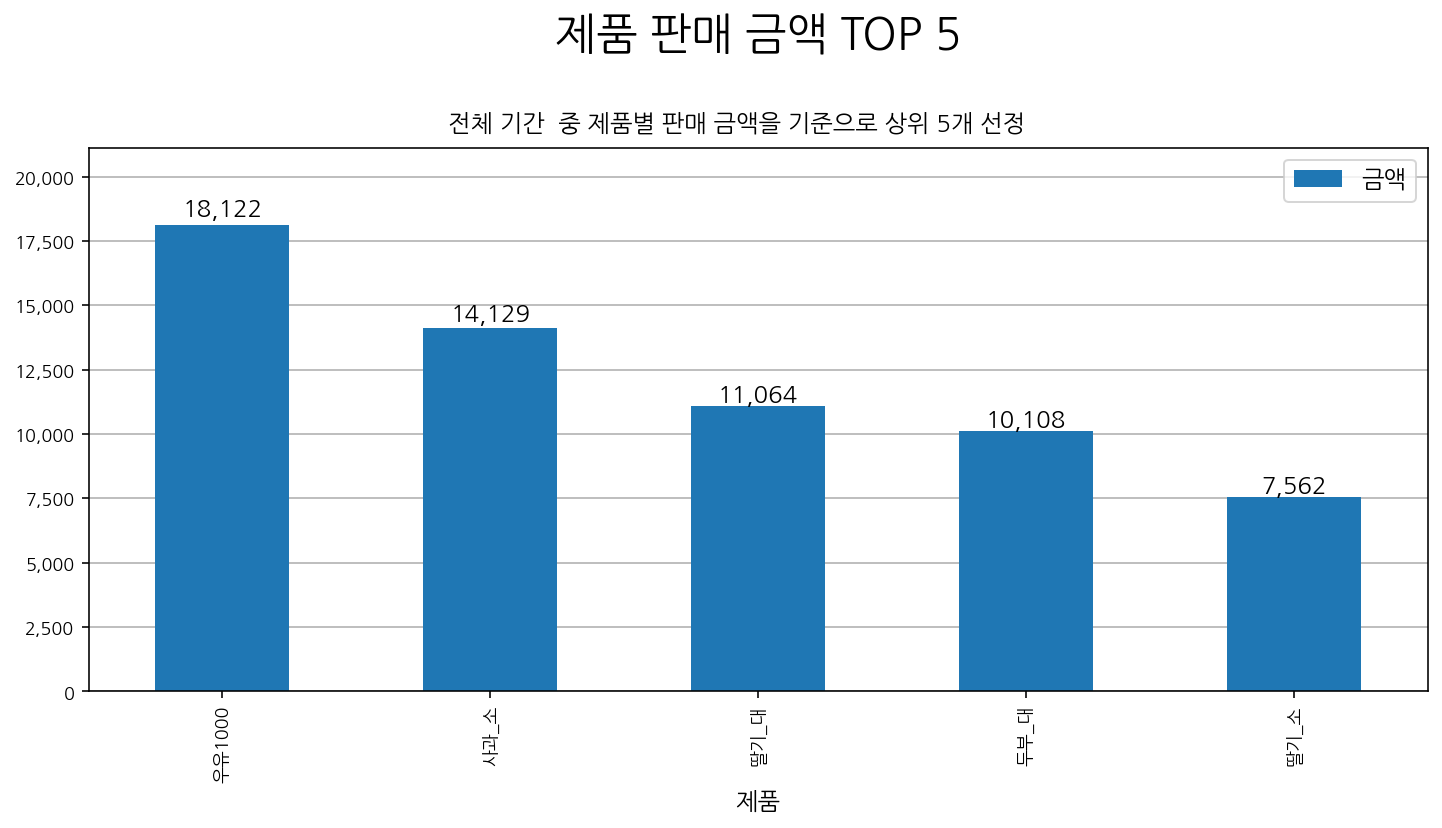

In [37]:
# 라이브러리 불러오기
import matplotlib as mpl

fig, ax1 = plt.subplots()
retail_top5.plot(kind='bar', x='제품', y='금액', ax=ax1)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid(axis='y')
ax1.set_axisbelow(True)

for p in ax1.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    plt.text(left+width/2,              # x
             height*1.02,               # y
             '{:,.0f}'.format(height),  # text
             color='k', fontsize=12, ha='center')

plt.ylim(0, retail_top5['금액'].max() + 3000)
plt.title('제품 판매 금액 TOP 5', pad=50)
plt.suptitle('전체 기간  중 제품별 판매 금액을 기준으로 상위 5개 선정', size=12, y=0.93)
plt.show()

## 7.7. 그래프 안에 값 표시

- 그래프 안에 값을 표시할 수 있습니다.
- 이때는 값이 잘 보이도록 색상 지정에 신경을 써야 합니다.

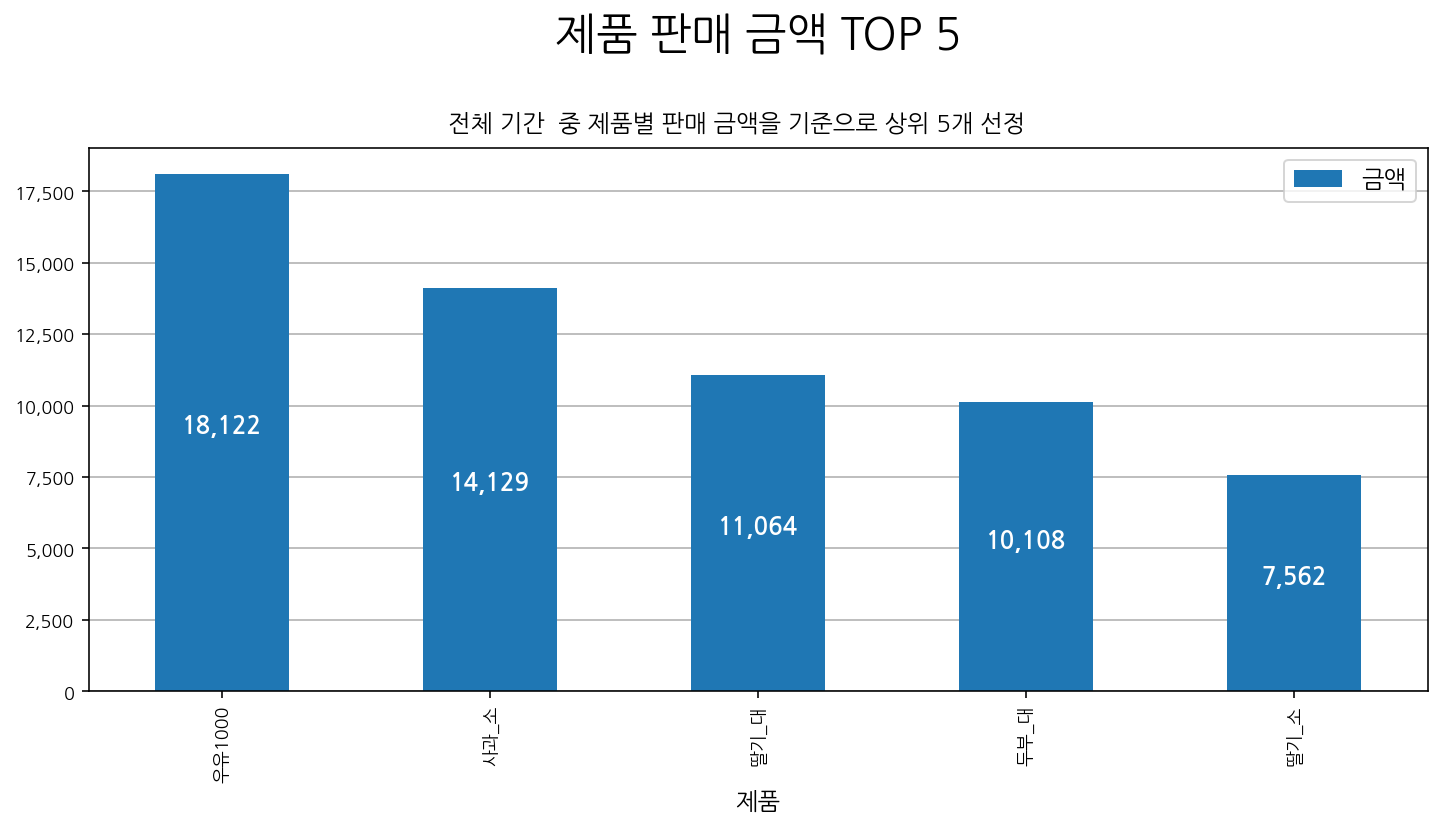

In [38]:
fig, ax1 = plt.subplots()
retail_top5.plot(kind='bar', x='제품', y='금액', ax=ax1) 
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid(axis='y')
ax1.set_axisbelow(True)

for p in ax1.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    plt.text(left+width/2, bottom+height/2, 
             '{:,.0f}'.format(height),
             color='w', fontsize=12, ha='center', weight='bold')

plt.title('제품 판매 금액 TOP 5', pad=50)
plt.suptitle('전체 기간  중 제품별 판매 금액을 기준으로 상위 5개 선정', size=12, y=0.93)
plt.show()

# 7.8. 지도 시각화 #1

- 데이터가 지도와 관련된 경우 지도를 사용해 시각화 하면 좋습니다.
- **folium** 라이브러리를 사용하면 쉽게 지도를 사용해 시각화 할 수 있습니다.
- tiles 옵션을 cartodbpositron, stamenwatercolor, openstreetmap, stamenterrain 중에 선택할 수 있습니다.

In [39]:
# 라이브러리 불러오기
import folium

# 여기(?)
m = folium.Map(location=[37.358748, 127.114817], tiles='openstreetmap', zoom_start=17)

# 마커 표시
marker1 = folium.Marker([37.358748, 127.114817],
              popup='KT',
              icon=folium.Icon(color='red'))
marker1.add_to(m)

# 확인
m 

## 7.9. 지도 시각화 #2

- **geopandas** 라이브러리를 사용해 시각화를 할 수도 있습니다.
- 구글 코렙에 geopandas 라이브러리를 직접 설치해야 합니다.

In [40]:
# 라이브러리 설치
!pip install geopandas > /dev/null

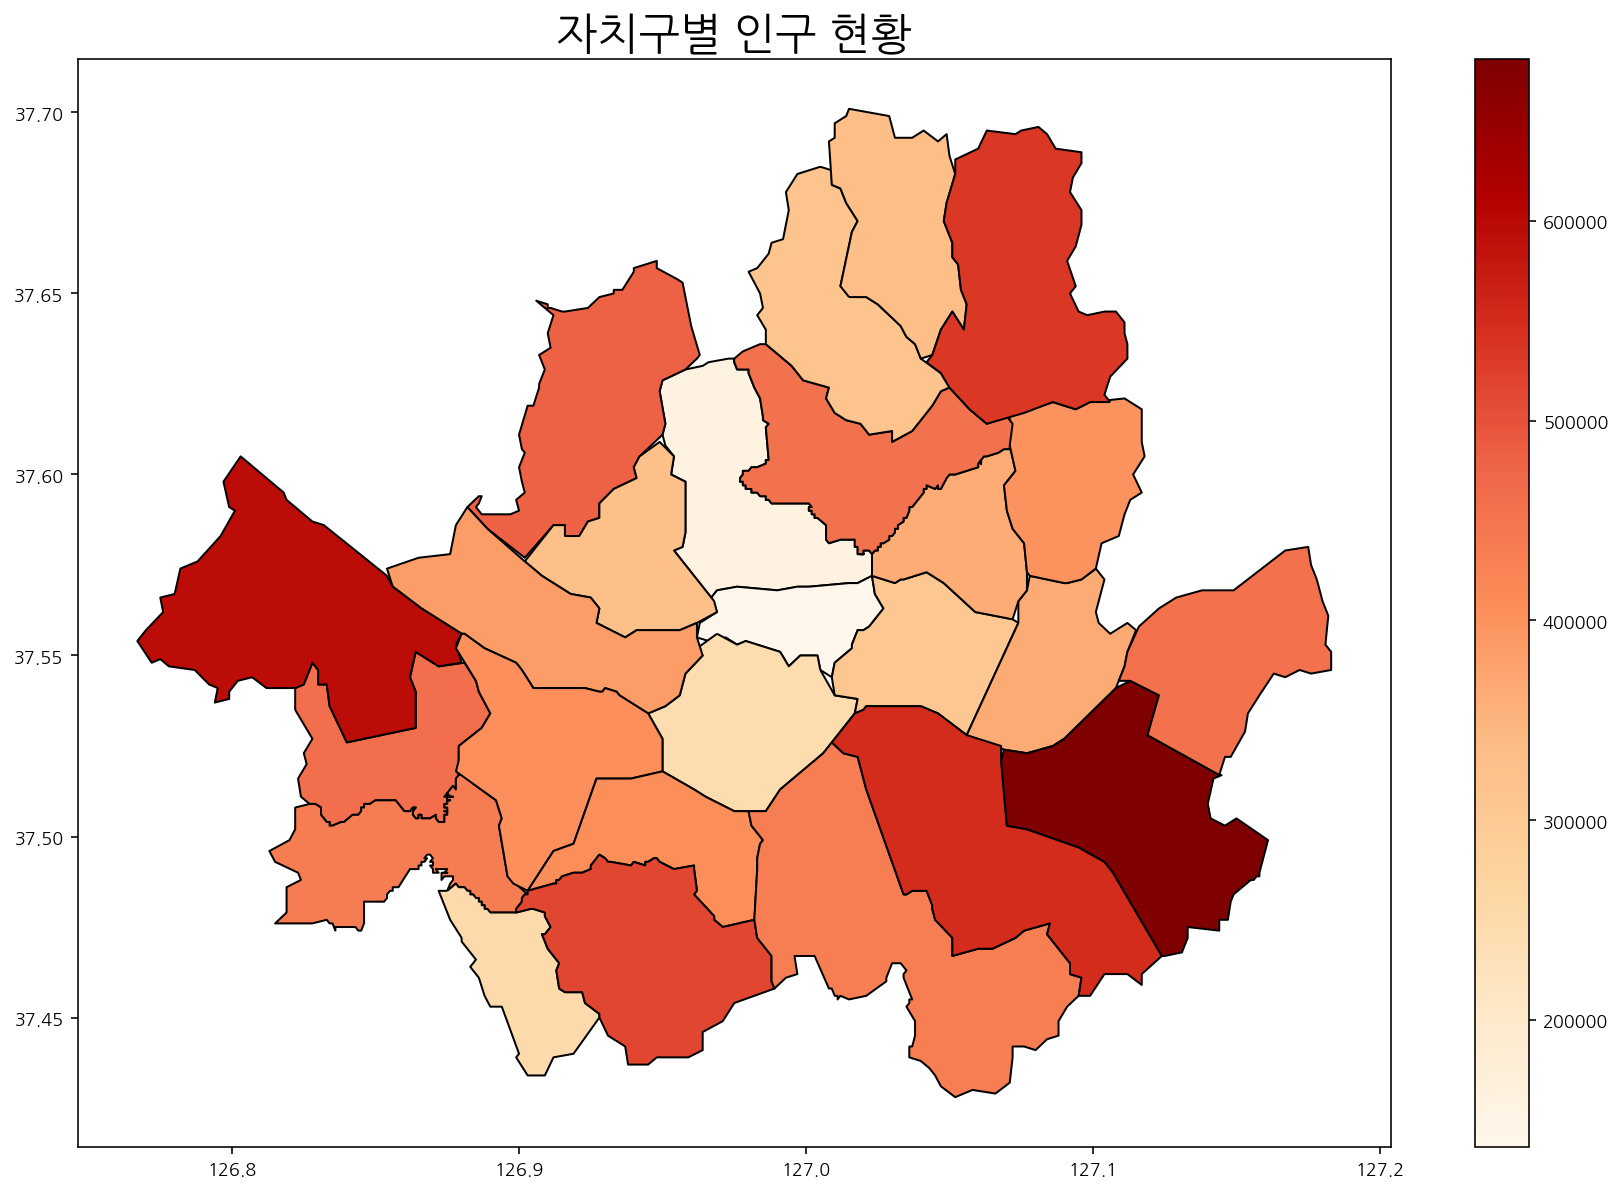

In [41]:
# 라이브러리 불러오기
import geopandas as gpd

# 지도 데이터 불러오기
file_path = 'https://raw.githubusercontent.com/Jangrae/json/master/TL_SCCO_SIG_SEOUL.json'
map_data = gpd.read_file(file_path)

# 자치구별 인구 정보 병합
map_seoul = pd.merge(map_data, spop[['자치구', '전체']], left_on='SIG_KOR_NM', right_on='자치구')

# 지도 표시
map_seoul.plot(column='전체', cmap='OrRd', edgecolor='k', legend=True, 
               categorical=False, figsize=(15, 10))

plt.title("자치구별 인구 현황")
plt.axis(True)
plt.show()

- 아래 코드를 실행하면 지도에 지역 이름이 표시됩니다.
- 코드가 다소 복잡하지만 얻는 결과가 의미가 있습니다.

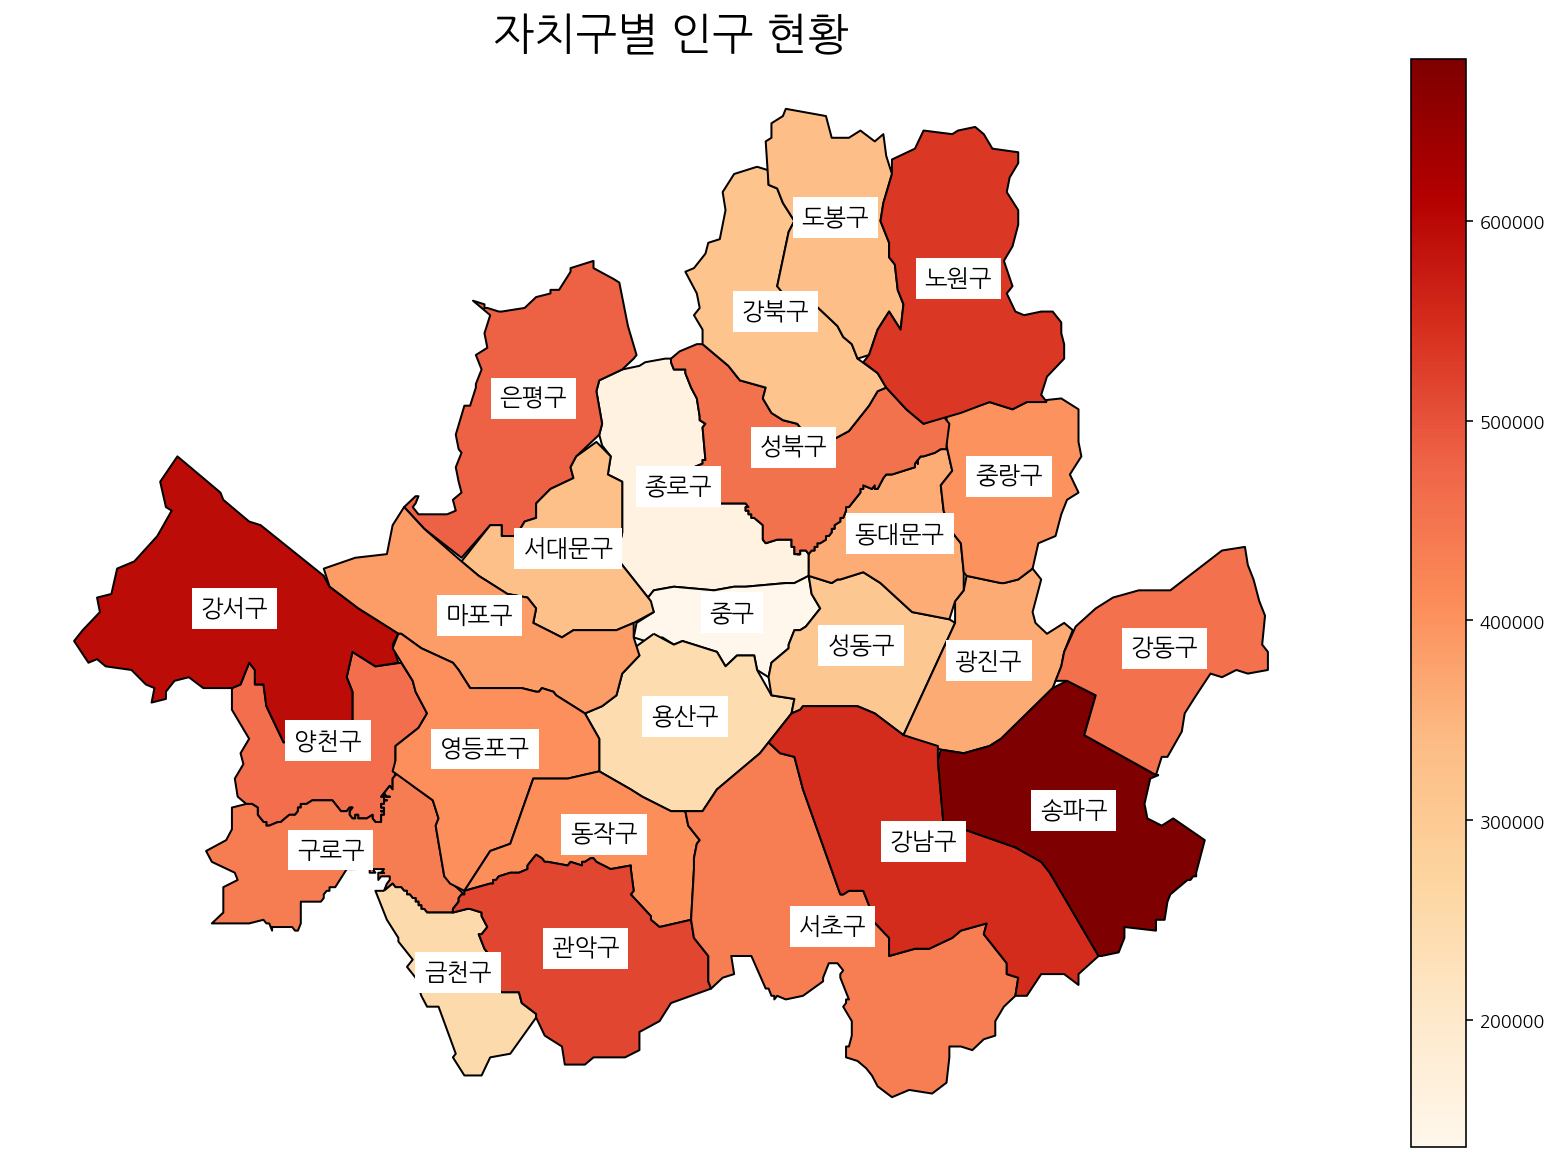

In [42]:
# 지도 표시
map_seoul.plot(column='전체', cmap='OrRd', edgecolor='k', legend=True, 
               categorical=False, figsize=(15, 10))

# 텍스트 표시할 좌표 구하기
map_seoul['center'] = gpd.GeoSeries.to_crs(map_seoul['geometry'], 'epsg:3395').centroid
map_seoul['center'] = gpd.GeoSeries.to_crs(map_seoul['center'], 'epsg:4326')
map_point = map_seoul.copy()
map_point.set_geometry('center', inplace=True)

# 텍스트 표시
for x, y, label in zip(map_point.geometry.x, map_point.geometry.y, map_point['SIG_KOR_NM']):
    plt.text(x, y, label, color='k', fontsize=12, ha='center', backgroundcolor='white')

plt.title("자치구별 인구 현황")
plt.axis(False)
plt.show()

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/end.png' width=300/></center>